# Business Problem 
3.With the growing consumption of avocados in the USA, a freelance company would like to do some analysis on the patterns of consumption in different cities and would like to come up with a prediction model for the price of avocados. For this to be implemented, build a prediction model using multilinear regression and provide your insights on it.
Snapshot of the dataset is given below: -


# Business Objective
The goal is to analyze avocado consumption trends across different U.S. cities and develop a multilinear regression model to predict avocado prices. This will help stakeholders (retailers, suppliers, and distributors) make informed pricing and inventory decisions based on demand patterns.

# Business Constraints
1. Data Quality: Missing or inconsistent data may impact model accuracy.
2. Multicollinearity: Correlated independent variables may affect model interpretability.
3. Feature Selection: Choosing relevant features like volume, region, and type of avocado is crucial.
4. Seasonality: Avocado demand and prices may fluctuate seasonally, requiring time-series adjustments.
5. Market Factors: External factors like weather conditions, import/export policies, and inflation may influence prices but might not be captured in the dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [3]:
data=pd.read_csv("Avacado_Price.csv")
data.head()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   tot_ava1      18249 non-null  float64
 3   tot_ava2      18249 non-null  float64
 4   tot_ava3      18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
data.describe()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
data.isnull().sum()

AveragePrice    0
Total_Volume    0
tot_ava1        0
tot_ava2        0
tot_ava3        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
data.shape

(18249, 12)

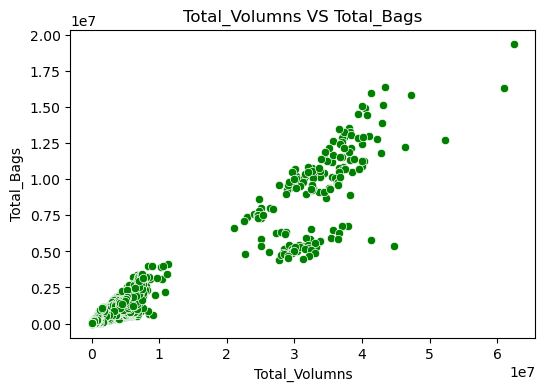

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['Total_Volume'],y=data['Total_Bags'],color='green')
plt.xlabel("Total_Volumns")
plt.ylabel("Total_Bags")
plt.title("Total_Volumns VS Total_Bags")
plt.show()

In [9]:
data.columns

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [10]:
# Encode categorical variables
data_encoded = data.copy()
label_enc_type = LabelEncoder()
label_enc_region = LabelEncoder()

data_encoded['type'] = label_enc_type.fit_transform(data_encoded['type'])
data_encoded['region'] = label_enc_region.fit_transform(data_encoded['region'])


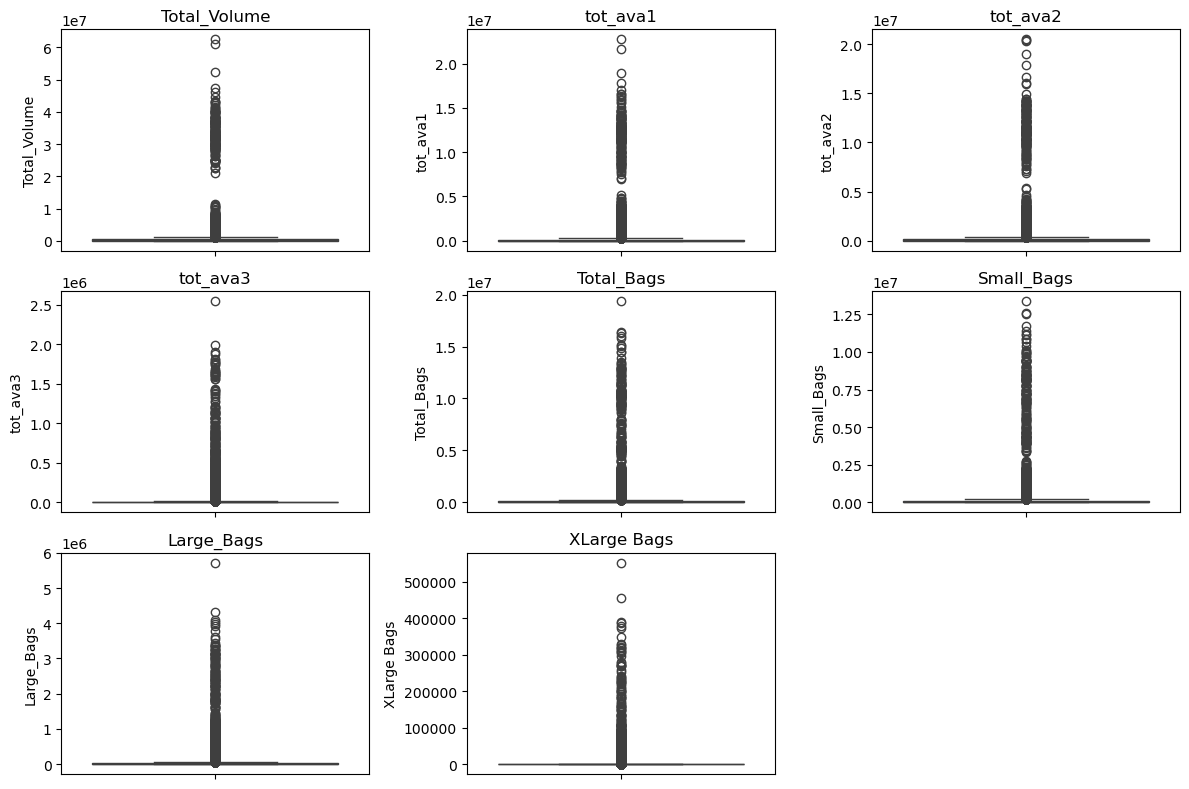

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical features to visualize outliers
numerical_features = ['Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3', 
                      'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data_encoded[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


In [12]:
# Define features and target variable
X = data_encoded.drop(columns=['AveragePrice'])  # Independent variables
y = data_encoded['AveragePrice']  # Target variable

In [13]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train the multilinear regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [15]:
# Predict on test set
y_pred = model.predict(X_test)


In [16]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [17]:
mae, rmse, r2

(0.24094605949896292, 0.31229736940730773, 0.39297813291262607)

In [18]:
#as r2 is very less we have to try diff model

In [19]:
# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=['region', 'type'], drop_first=True)

# Display first few rows after encoding
print(data.head())

   AveragePrice  Total_Volume  tot_ava1   tot_ava2  tot_ava3  Total_Bags  \
0          1.33      64236.62   1036.74   54454.85     48.16     8696.87   
1          1.35      54876.98    674.28   44638.81     58.33     9505.56   
2          0.93     118220.22    794.70  109149.67    130.50     8145.35   
3          1.08      78992.15   1132.00   71976.41     72.58     5811.16   
4          1.28      51039.60    941.48   43838.39     75.78     6183.95   

   Small_Bags  Large_Bags  XLarge Bags  year  ...  region_SouthCentral  \
0     8603.62       93.25          0.0  2015  ...                False   
1     9408.07       97.49          0.0  2015  ...                False   
2     8042.21      103.14          0.0  2015  ...                False   
3     5677.40      133.76          0.0  2015  ...                False   
4     5986.26      197.69          0.0  2015  ...                False   

   region_Southeast  region_Spokane  region_StLouis  region_Syracuse  \
0             False       

In [20]:
data.head()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,False,False,False,False,False,False,False,False,False,False
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,False,False,False,False,False,False,False,False,False,False
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,False,False,False,False,False,False,False,False,False,False
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,False,False,False,False,False,False,False,False,False,False
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# Drop highly correlated features
data.drop(columns=['Total_Bags', 'Small_Bags'], inplace=True)

# Display remaining columns
print(data.columns)

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Large_Bags', 'XLarge Bags', 'year', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region_Raleigh

In [22]:
from sklearn.model_selection import train_test_split

# Define target variable (y) and features (X)
X = data.drop(columns=['AveragePrice'])  # Features
y = data['AveragePrice']  # Target variable

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (14599, 61), Test set: (3650, 61)


In [23]:
# Linear Regression (baseline)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluate
print("🔹 Linear Regression Results")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.2f}")

🔹 Linear Regression Results
MAE: 0.20
MSE: 0.07
RMSE: 0.27
R² Score: 0.55


In [24]:
# Polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures

# Transform features to polynomial degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = lr_poly.predict(X_test_poly)

# Evaluate
print(" Polynomial Regression Results")
print(f"R² Score: {r2_score(y_test, y_pred_poly):.2f}")

🔹 Polynomial Regression Results
R² Score: 0.66


In [26]:
# Random Forest Regression (Better for Complex Data)
from sklearn.ensemble import RandomForestRegressor

# Train Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
print("🔹 Random Forest Results")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")

🔹 Random Forest Results
R² Score: 0.85
